In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_titanic = df[['survived',	'pclass',	'sex',	'age', 'fare'	,'embarked']]

In [ ]:
df_titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [ ]:
df_titanic.loc[:, 'age'] = df_titanic['age'].fillna(df_titanic['age'].median())


In [ ]:
df_titanic.loc[:,'embarked']= df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df_titanic.loc[:,'sex'] = en.fit_transform(df_titanic['sex'])
df_titanic.loc[:,'embarked']= en.fit_transform(df_titanic['embarked'])

In [ ]:
df_titanic.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [ ]:
X = df_titanic.drop("survived",axis =1)
y = df_titanic["survived"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = DecisionTreeClassifier(
    criterion ="gini",
    max_depth = 4,
    random_state = 42
)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7988826815642458


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[96  9]
 [27 47]]


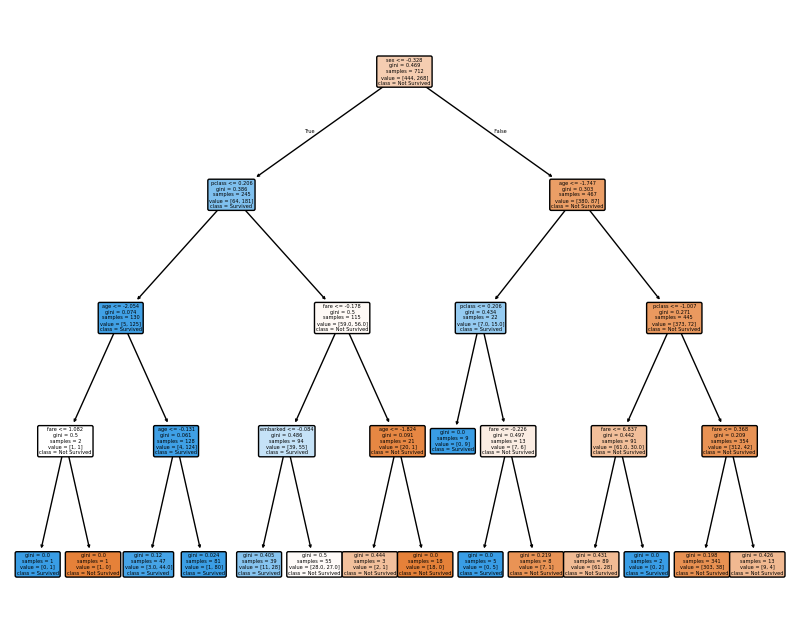

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plot_tree(model,filled=True,feature_names=['pclass','sex','age','fare','embarked'],class_names=['Not Survived','Survived'],rounded = True)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
new_pass = pd.DataFrame([[3,1,25,7,2]],columns= X.columns)
prediction = model.predict(new_pass)
if prediction == 0:
  print("Not Survived")
else:
  print("Survived")

Not Survived
